In [5]:

# In-Lab:

# Write Python programs to:
# •	Load the Titanic dataset using pandas
# •	Display basic information: number of rows, columns, missing values per column
# •	Handle missing values:
# 	Impute missing 'Age' with median
# 	Impute missing 'Embarked' with mode
# 	Drop irrelevant columns
# •	Detect and treat outliers in 'Fare' column using IQR method
# •	Encode categorical columns:
# 	Apply one-hot encoding to 'Sex' and 'Embarked'
# 	Apply label encoding to other categorical variables
# •	Split data into training (70%), validation (15%), and testing (15%) sets
# •	Print shapes of all splits

# ==========================================================
# EXPERIMENT #2
# Data Pre-processing on Titanic Dataset
# ==========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ----------------------------------------------------------
# 1. Load the Titanic Dataset using pandas
# ----------------------------------------------------------
df = pd.read_csv("C:/Users/User/Downloads/Titanic-Dataset.csv")

# ----------------------------------------------------------
# 2. Display Basic Information
# ----------------------------------------------------------
print("Basic Dataset Information")
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

print("\nMissing Values per Column:")
print(df.isnull().sum())

# ----------------------------------------------------------
# 3. Handle Missing Values
# ----------------------------------------------------------

# Impute missing 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Impute missing 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

print("\nMissing Values After Handling:")
print(df.isnull().sum())

# ----------------------------------------------------------
# 4. Detect and Treat Outliers in 'Fare' using IQR Method
# ----------------------------------------------------------
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df['Fare'] = np.where(df['Fare'] < lower_bound, lower_bound, df['Fare'])
df['Fare'] = np.where(df['Fare'] > upper_bound, upper_bound, df['Fare'])

# ----------------------------------------------------------
# 5. Encode Categorical Variables
# ----------------------------------------------------------

# One-Hot Encoding for 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Label Encoding for other categorical variables
le = LabelEncoder()
df['Pclass'] = le.fit_transform(df['Pclass'])

# ----------------------------------------------------------
# 6. Split Features and Target
# ----------------------------------------------------------
X = df.drop('Survived', axis=1)
y = df['Survived']

# ----------------------------------------------------------
# 7. Split Data into Train (70%), Validation (15%), Test (15%)
# ----------------------------------------------------------

# Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

# ----------------------------------------------------------
# 8. Print Shapes of Data Splits
# ----------------------------------------------------------
print("\nData Split Shapes:")
print("Training Set:", X_train.shape)
print("Validation Set:", X_val.shape)
print("Testing Set:", X_test.shape)


Basic Dataset Information
Number of Rows: 891
Number of Columns: 12

Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values After Handling:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Data Split Shapes:
Training Set: (623, 8)
Validation Set: (134, 8)
Testing Set: (134, 8)


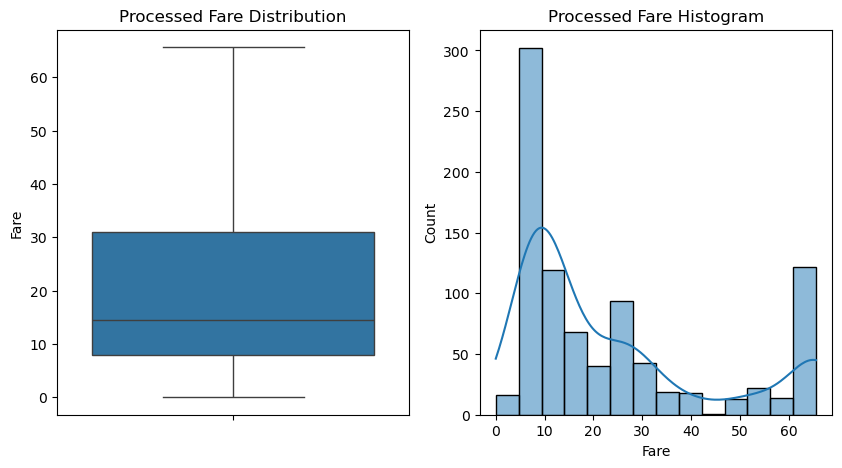

In [6]:

# ==========================================================
# ---------------------- POST-LAB ---------------------------
# ==========================================================

# ----------------------------------------------------------
# 7. KNN Imputation for Age Column
# ----------------------------------------------------------
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = df.copy()
df_knn[['Age']] = knn_imputer.fit_transform(df_knn[['Age']])

# ----------------------------------------------------------
# 8. Feature Scaling using StandardScaler
# ----------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------------------------------------
# 9. Save Preprocessed Data
# ----------------------------------------------------------
X_train.to_csv("train_data.csv", index=False)
X_val.to_csv("validation_data.csv", index=False)
X_test.to_csv("test_data.csv", index=False)

# ----------------------------------------------------------
# 10. Visualization: Original vs Processed Fare
# ----------------------------------------------------------
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(y=df['Fare'])
plt.title("Processed Fare Distribution")

plt.subplot(1,2,2)
sns.histplot(df['Fare'], kde=True)
plt.title("Processed Fare Histogram")

plt.show()

# ----------------------------------------------------------
# End of Experiment
# ----------------------------------------------------------


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("C:/Users/User/Downloads/Titanic-Dataset.csv")
print("Basic Dataset Information")
print("No of Rows:", df.shape[0])
print("No of Columns:", df.shape[1])
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
print("\nMissing values after Handling.")
print(df.isnull().sum())

pri
# ------------------------------------------------------------------------
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Fare'] = np.where(df['Fare'] < lower_bound, lower_bound, df['Fare'])
df['Fare'] = np.where(df['Fare'] > upper_bound, upper_bound, df['Fare'])
print(lower_bound)
print(upper_bound)

# -------------------------------------------------------------------------
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)
print("\nDataset Shapes:")
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

# ------------------------------------------------------------------
X=df.drop("Survived",axis=1)
y=df["Survived"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42,stratify=y_temp)

print("\nDataset Split Shape")
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)


Basic Dataset Information
No of Rows: 891
No of Columns: 12

Missing values after Handling.
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
-26.724
65.6344

Dataset Shapes:
Training set: (623, 8) (623,)
Validation set: (134, 8) (134,)
Testing set: (134, 8) (134,)

Dataset Split Shape
Training set: (623, 8) (623,)
Validation set: (134, 8) (134,)
Testing set: (134, 8) (134,)
